In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpig
from scipy import ndimage
%matplotlib inline

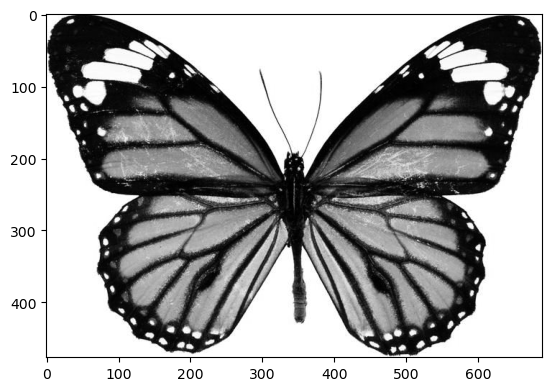

In [2]:
image = cv2.imread("Butterfly.jpg",cv2.IMREAD_GRAYSCALE)
plt.imshow(image,cmap='gray')

## Robert

In [3]:
def roberts_cross(img_path):

    gx = np.array([[1, 0], [0, -1]])
    gy = np.array([[0, 1], [-1, 0]])

    gradient_x = ndimage.convolve(image, gx)
    gradient_y = ndimage.convolve(image, gy)
 
    magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

    threshold = 10
    edges = magnitude > threshold
    
    return edges

In [4]:
image_path = "Butterfly.jpg"
edge_image = roberts_cross(image_path)

In [5]:
original_image = cv2.imread(image_path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

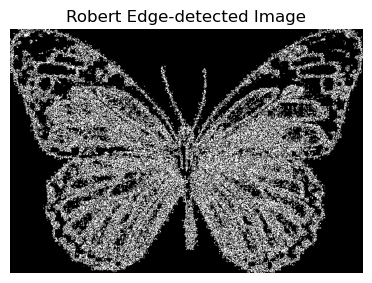

In [8]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 2)
plt.imshow(edge_image, cmap='gray')
plt.title('Robert Edge-detected Image')
plt.axis('off')
plt.show()

## Sober

In [9]:
Gx = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
Gy = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

In [10]:
def convolve(X, F):

    X_height = X.shape[0]
    X_width = X.shape[1]

    F_height = F.shape[0]
    F_width = F.shape[1]
    
    H = (F_height - 1) // 2
    W = (F_width - 1) // 2

    out = np.zeros((X_height, X_width))
    for i in np.arange(H, X_height-H):
        for j in np.arange(W, X_width-W):
            sum = 0
            for k in np.arange(-H, H+1):
                for l in np.arange(-W, W+1):
                    a = X[i+k, j+l]
                    w = F[H+k, W+l]
                    sum += (w * a)
            out[i,j] = sum 
    return out

In [11]:
sob_x = convolve(image, Gx) / 8.0
sob_y = convolve(image, Gy) / 8.0

In [12]:
sob_out = np.sqrt(np.power(sob_x, 2) + np.power(sob_y, 2))
sob_out = (sob_out / np.max(sob_out)) * 255

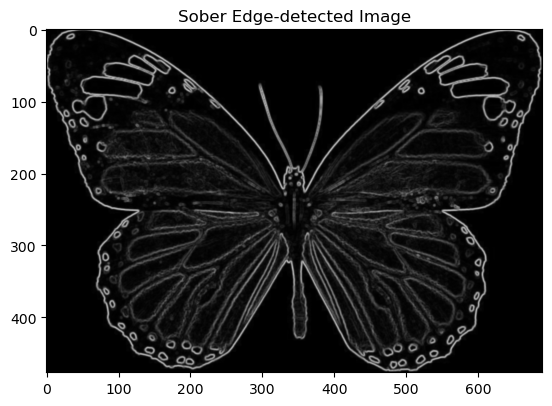

In [23]:
plt.imshow(sob_out, cmap = 'gray', interpolation = 'bicubic')
plt.title('Sober Edge-detected Image')
plt.show()

## Prewitt

In [14]:
Hx = np.array([[-1, 0, 1],[-1, 0, 1],[-1, 0, 1]])
Hy = np.array([[-1, -1, -1],[0, 0, 0],[1, 1, 1]])

In [15]:
pre_x = convolve(image, Hx) / 6.0
pre_y = convolve(image, Hy) / 6.0

In [16]:
pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
pre_out = (pre_out / np.max(pre_out)) * 255

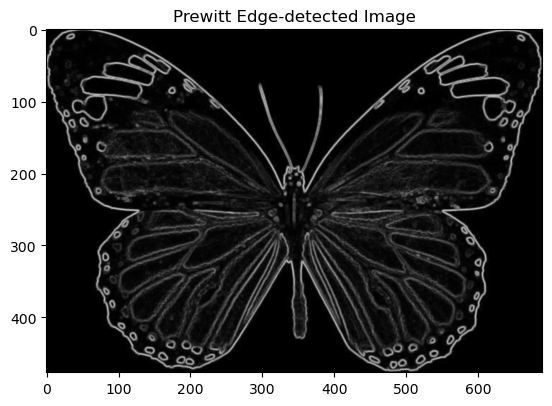

In [28]:
plt.imshow(pre_out, cmap = 'gray', interpolation = 'bicubic')
plt.title('Prewitt Edge-detected Image')
plt.show()

## Laplacian 

In [18]:
blur_img = cv2.GaussianBlur(image, (3, 3), 0)

In [19]:
laplacian = cv2.Laplacian(blur_img, cv2.CV_64F)

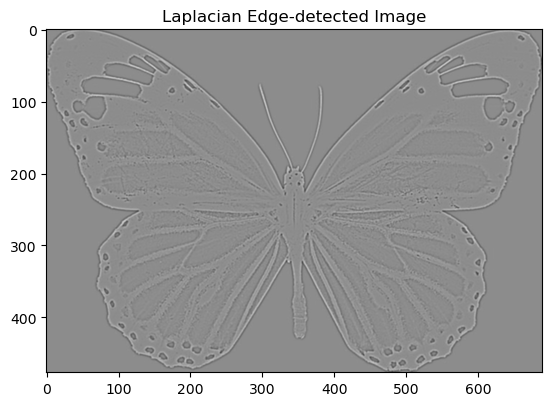

In [21]:
plt.imshow(laplacian, cmap = 'gray',interpolation = 'bicubic')
plt.title('Laplacian Edge-detected Image')
plt.show()

## Canny

In [30]:
edge = cv2.Canny(image, 100, 200)

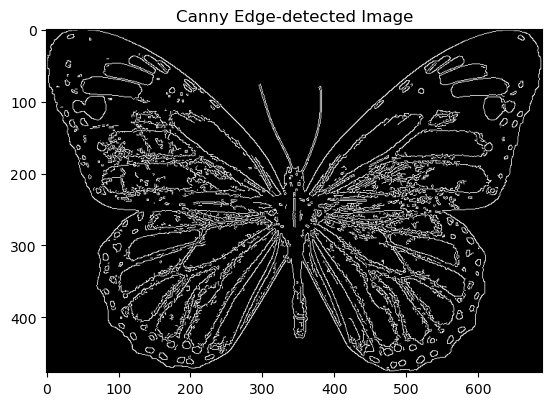

In [31]:
plt.imshow(edge, cmap = 'gray')
plt.title('Canny Edge-detected Image')
plt.show()